In [1]:
#import Computation Libraries
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind # just the t-test from scipy.stats
from scipy.stats import probplot 

#import Visualization Libraries
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [5]:
shoes =pd.read_csv("D:\DBDA\Adavance Stats\Day 7\women_shoe_prices.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dbda\AppData\Local\Temp\ipykernel_22624\426717758.py:1: SyntaxWarning: invalid escape sequence '\D'
  shoes =pd.read_csv("D:\DBDA\Adavance Stats\Day 7\women_shoe_prices.csv")
C:\Users\dbda\AppData\Local\Temp\ipykernel_22624\426717758.py:1: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  shoes =pd.read_csv("D:\DBDA\Adavance Stats\Day 7\women_shoe_prices.csv")


In [7]:
shoes["midprices"]=(shoes["prices.amountMax"]+shoes["prices.amountMin"])/2

In [9]:
shoes

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,midprices
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.99
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.99
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.99
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.99
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33796,AVsUxZClnnc1JgDc4Mev,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Blue,NaN,2017-03-28T11:55:43Z,2017-03-28T11:55:43Z,"[{""dateSeen"":[""2017-03-26T10:04:21.331Z""],""sou...",NaN,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.19
33797,AVsUyEcaU2_QcyX9Pb4g,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Red,NaN,2017-03-28T11:58:41Z,2017-03-28T11:58:41Z,"[{""dateSeen"":[""2017-03-26T18:48:59.335Z""],""sou...",30 in x 31 in,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99
33798,AVsUyEcaU2_QcyX9Pb4g,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Red,NaN,2017-03-28T11:58:41Z,2017-03-28T11:58:41Z,"[{""dateSeen"":[""2017-03-26T18:48:59.335Z""],""sou...",30 in x 31 in,...,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.99
33799,AVticmzVnnc1JgDc5Uym,B06XZJTJBT,City Classified,"Clothing,,Women,Shoes,Pumps",NaN,NaN,2017-04-12T13:55:17Z,2017-04-13T20:44:29Z,NaN,NaN,...,https://www.amazon.com/City-Classified-Womens-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.64


((array([-4.10169767, -3.89168073, -3.77701151, ...,  3.77701151,
          3.89168073,  4.10169767]),
  array([False, False, False, ...,  True,  True,  True])),
 (0.022025282700180542, 0.008047099198248567, 0.2464931410815657))

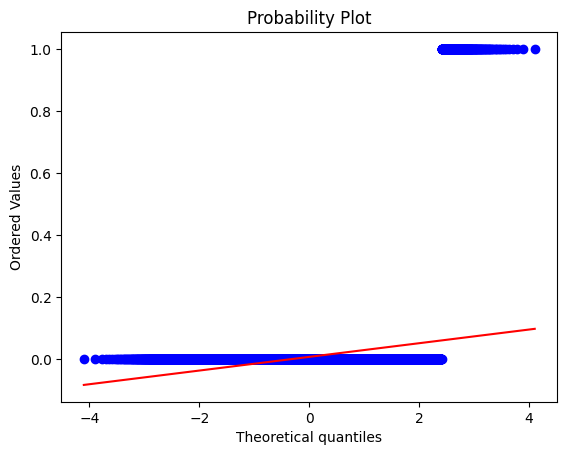

In [14]:
# plot a qqplot to check normality. If the varaible is normally distributed, most of the points 
# should be along the center diagonal.
probplot(shoes["colors"]=='Pink', dist="norm", plot=pylab)

In [11]:
pink= shoes[shoes.colors =="Pink"]
notpink=shoes[shoes.colors!="Pink"]

In [12]:
ttest_ind(pink.midprices,notpink.midprices,equal_var=False)

TtestResult(statistic=-9.765333304558089, pvalue=9.890604434815107e-20, df=298.8638962565323)